<a href="https://colab.research.google.com/github/DSCI-552/final-project-Uttamkannantha/blob/main/Kannantha_Balkattu_Shreekantha_Uttam_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Name: Balkattu Shreekantha Uttam<br>
Last Name: Kannantha<br>
USC ID: 9202391620<br>
Github username: Uttamkannantha

Transfer Learning for Image Classification

(a)
In this problem, we are trying to build a classifier that distinguishes images of 20 bird species. You are provided with text data in twenty folders.

In [1]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from tensorflow.keras.applications import EfficientNetB0

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from keras.layers import Dropout, Dense, GlobalMaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras import activations
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from keras.callbacks import EarlyStopping
import splitfolders



(b)
Data Exploration and Pre-processing

i.
Images in each class are given in separate folders. The file
Classes.xlsx
pro-
vides the classes assigned to the bird species images in each folder. Therefore,
you encode your classes using one-hot encoding and
Classes.xlsx
.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ii.
Randomly select
d
0
.
7
n
i
e
images from each folder as your training set,
d
0
.
15
n
i
e
as validation set, and the rest as your test set, where
n
i
is the number of
images in folder
i
and
d
x
e
is the ceiling of
x


In [4]:
#Loading the files from drive
input_folder = '/content/drive/MyDrive/Colab Notebooks/Data/images'

#Using split folder to split the data into test, train and validation
splitfolders.ratio(input_folder, output='/content/drive/MyDrive/Colab Notebooks/Data/FormattedImages',
                  ratio = (.7, .15, .15))


# df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Classes.xlsx')


Copying files: 1176 files [22:10,  1.13s/ files]


In [5]:
#Assigning the test, train and validation data to variables
testData = '/content/drive/MyDrive/Colab Notebooks/Data/FormattedImages/test'
trainData = '/content/drive/MyDrive/Colab Notebooks/Data/FormattedImages/train'
valData = '/content/drive/MyDrive/Colab Notebooks/Data/FormattedImages/val'


iii.
In order for all the images to have the same size, zero-pad or resize the images
in your dataset. This can be done using various tools, including OpenCV.

In [6]:
generator = ImageDataGenerator()

#Pre processing the data
val_generator = generator.flow_from_directory(valData, shuffle=True, class_mode='categorical', target_size=(224, 224), batch_size=5 )
train_generator = generator.flow_from_directory(trainData, batch_size=5, shuffle=True, class_mode='categorical', target_size=(224, 224) )
test_generator = generator.flow_from_directory(testData, shuffle=True, class_mode='categorical', target_size=(224, 224), batch_size=5)



Found 171 images belonging to 20 classes.
Found 820 images belonging to 20 classes.
Found 185 images belonging to 20 classes.


In [7]:
#Creating the parameters for the model and assigning the values
n_classes = 20
batch_size = 5
epochs = 100
height = 224
width = 224
channels = 3
input_shape = (height, width, channels)

In [8]:
#First model EfficientNetB0
netB0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)
netB0.trainable = False

#Setting the model
model = Sequential()
model.add(netB0)
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation(activations.relu))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

16705208/16705208 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 1280)       5120      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 7, 1280)        0         
                                                                 
 global_max_pooling2d (Globa  (None, 1280)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                         

In [9]:
#Setting the early stop 
optimizer = Adam(learning_rate = 0.001)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

#Compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Fitting the model to the data
saved_model = model.fit(train_generator, validation_data = val_generator, callbacks = [early_stop], verbose = 1, epochs = epochs)


Epoch 1/100
164/164 [==============================] - 22s 56ms/step - loss: 6.4270 - accuracy: 0.3305 - val_loss: 1.0874 - val_accuracy: 0.7895
Epoch 2/100
164/164 [==============================] - 8s 46ms/step - loss: 2.1641 - accuracy: 0.6756 - val_loss: 0.7975 - val_accuracy: 0.8772
Epoch 3/100
164/164 [==============================] - 7s 45ms/step - loss: 1.7022 - accuracy: 0.7561 - val_loss: 1.1477 - val_accuracy: 0.8421
Epoch 4/100
164/164 [==============================] - 7s 45ms/step - loss: 1.1554 - accuracy: 0.8171 - val_loss: 1.5304 - val_accuracy: 0.8129
Epoch 5/100
164/164 [==============================] - 10s 62ms/step - loss: 0.8815 - accuracy: 0.8768 - val_loss: 0.8848 - val_accuracy: 0.8480
Epoch 6/100
164/164 [==============================] - 9s 54ms/step - loss: 0.8585 - accuracy: 0.8707 - val_loss: 0.7736 - val_accuracy: 0.8772
Epoch 7/100
164/164 [==============================] - 8s 47ms/step - loss: 0.8791 - accuracy: 0.8561 - val_loss: 1.0163 - val_accurac

In [11]:
#Calculating the Train accuracy
train_loss, train_accuracy = model.evaluate(x = train_generator, verbose = 1)
print('Accuracy Training :', round((train_accuracy*100), 3), "%")

164/164 [==============================] - 6s 37ms/step - loss: 0.1502 - accuracy: 0.9744
Accuracy Training : 97.439 %


In [12]:
#Calculating the Validation accuracy
val_loss, val_accuracy = model.evaluate(x = val_generator, verbose = 1)
print('Accuracy Validation:', round((val_accuracy*100), 3), "%")

35/35 [==============================] - 1s 36ms/step - loss: 0.7736 - accuracy: 0.8772
Accuracy Validation: 87.719 %


In [13]:
#Calculating the Test accuracy
test_loss, test_accuracy = model.evaluate(x = test_generator, verbose = 1)
print('Accuracy Test:', round((test_accuracy*100), 3), "%")

37/37 [==============================] - 1s 38ms/step - loss: 0.8474 - accuracy: 0.8595
Accuracy Test: 85.946 %


In [14]:
#Generating the values to plot graphs
test_generator.batch_size  = test_generator.samples
test_dataset = next(test_generator)

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 5s 5s/step


Text(0, 0.5, 'Accuracy')

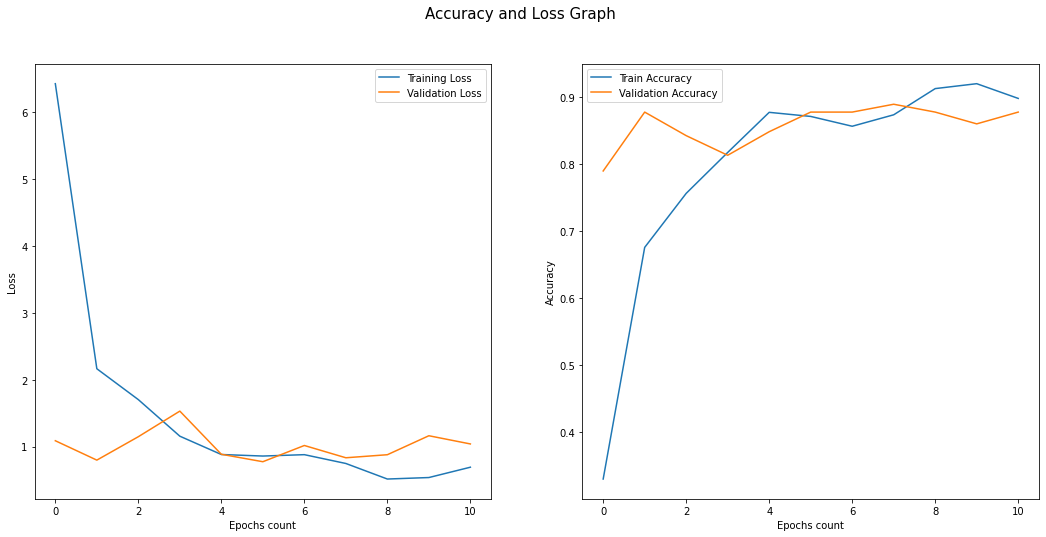

In [15]:
#Graph pg Loss and accuracy 
plt.figure(figsize=(18,8))

plt.suptitle('Accuracy and Loss Graph', fontsize=15)

plt.subplot(1,2,1)
plt.plot(saved_model.history['loss'], label='Training Loss')
plt.plot(saved_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs count', fontsize=10)
plt.ylabel('Loss', fontsize=10)

plt.subplot(1,2,2)
plt.plot(saved_model.history['accuracy'], label='Train Accuracy')
plt.plot(saved_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs count', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)


In [16]:
#Values for each classes
target = ["Category {}".format(i) for i in range(n_classes)]
print(classification_report(np.argmax(test_dataset[1], axis=1), y_pred, target_names=target))

              precision    recall  f1-score   support

  Category 0       1.00      0.88      0.93         8
  Category 1       1.00      1.00      1.00         9
  Category 2       1.00      1.00      1.00        10
  Category 3       0.69      0.90      0.78        10
  Category 4       0.62      0.56      0.59         9
  Category 5       0.88      0.78      0.82         9
  Category 6       0.69      1.00      0.82         9
  Category 7       0.88      0.78      0.82         9
  Category 8       1.00      1.00      1.00         9
  Category 9       1.00      0.89      0.94         9
 Category 10       1.00      0.78      0.88         9
 Category 11       0.88      0.78      0.82         9
 Category 12       1.00      0.78      0.88         9
 Category 13       0.67      0.89      0.76         9
 Category 14       1.00      0.67      0.80         9
 Category 15       0.70      0.70      0.70        10
 Category 16       0.83      1.00      0.91        10
 Category 17       0.83    

In [17]:
#Second model VGG16
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape, classes=n_classes)
base_model.trainable = False

#Setting the values
model_vgg = Sequential()
model_vgg.add(base_model)
model_vgg.add(keras.layers.BatchNormalization())
model_vgg.add(keras.layers.Activation(activations.relu))
model_vgg.add(GlobalMaxPooling2D())
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(n_classes, activation='softmax'))

model_vgg.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 512)        2048      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 7, 7, 512)         0         
                                                                 
 global_max_pooling2d_1 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                       

In [18]:
#Setting the early stop parameter
optimizer = Adam(learning_rate = 0.0001)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)

model_vgg.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
#Fitting the model on data
model_history = model_vgg.fit(train_generator, validation_data = val_generator, callbacks = [early_stop], verbose = 1, epochs = epochs)


Epoch 1/100
164/164 [==============================] - 11s 52ms/step - loss: 11.0335 - accuracy: 0.0427 - val_loss: 8.3011 - val_accuracy: 0.0702
Epoch 2/100
164/164 [==============================] - 7s 46ms/step - loss: 9.5546 - accuracy: 0.0805 - val_loss: 7.0663 - val_accuracy: 0.0819
Epoch 3/100
164/164 [==============================] - 8s 47ms/step - loss: 8.8317 - accuracy: 0.0854 - val_loss: 6.4556 - val_accuracy: 0.0936
Epoch 4/100
164/164 [==============================] - 8s 46ms/step - loss: 8.5365 - accuracy: 0.0841 - val_loss: 5.9504 - val_accuracy: 0.1287
Epoch 5/100
164/164 [==============================] - 8s 47ms/step - loss: 7.9362 - accuracy: 0.1122 - val_loss: 5.5816 - val_accuracy: 0.1404
Epoch 6/100
164/164 [==============================] - 8s 46ms/step - loss: 7.4040 - accuracy: 0.1402 - val_loss: 5.2105 - val_accuracy: 0.1813
Epoch 7/100
164/164 [==============================] - 8s 47ms/step - loss: 7.2955 - accuracy: 0.1451 - val_loss: 4.8748 - val_accurac

In [20]:
train_loss, train_accuracy = model_vgg.evaluate(x = train_generator, verbose = 1)
print('Accuracy Training:', round((train_accuracy * 100), 3), "%")

164/164 [==============================] - 6s 38ms/step - loss: 0.6256 - accuracy: 0.8146
Accuracy Training: 81.463 %


In [21]:
val_loss, val_accuracy = model_vgg.evaluate(x = val_generator, verbose = 1)
print('Accuracy Validation:', round((val_accuracy * 100), 3), "%")

35/35 [==============================] - 1s 37ms/step - loss: 1.8063 - accuracy: 0.6140
Accuracy Validation: 61.404 %


In [22]:
test_loss, test_accuracy = model_vgg.evaluate(x = test_generator, verbose = 1)
print('Accuracy Test:', round((test_accuracy * 100), 3), "%")

1/1 [==============================] - 26s 26s/step - loss: 2.2390 - accuracy: 0.5189
Accuracy Test: 51.892 %


In [23]:
test_generator.batch_size  = test_generator.samples
test_dataset = next(test_generator)

y_pred = model_vgg.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 1s 1s/step


Text(0, 0.5, 'Accuracy')

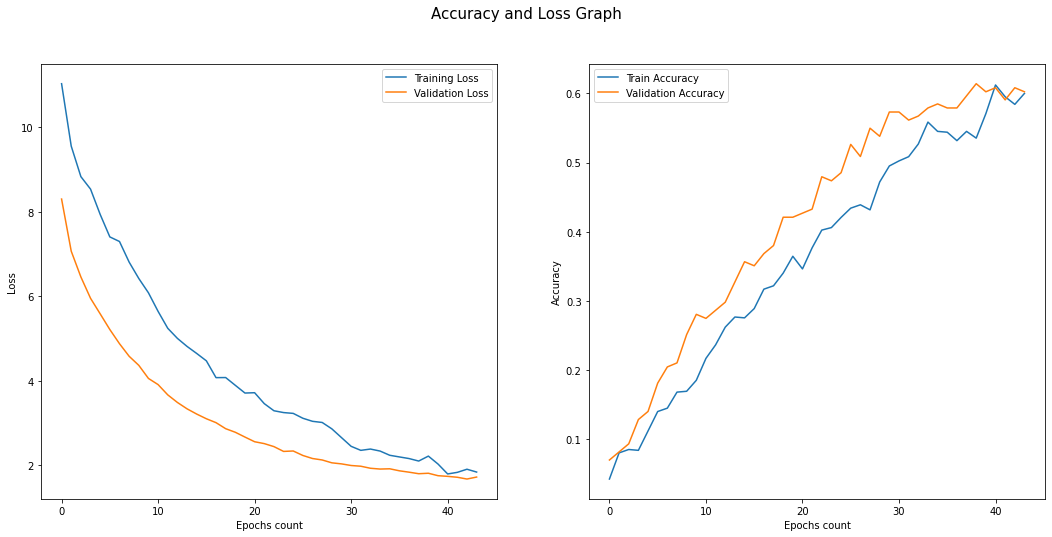

In [24]:
plt.figure(figsize=(18,8))
plt.suptitle('Accuracy and Loss Graph', fontsize=15)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs count', fontsize=10)
plt.ylabel('Loss', fontsize=10)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs count', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)


In [25]:
#Values for each classes
target = ["Category {}".format(i) for i in range(n_classes)]
print(classification_report(np.argmax(test_dataset[1], axis=1), y_pred, target_names=target))

              precision    recall  f1-score   support

  Category 0       0.67      0.50      0.57         8
  Category 1       0.67      0.67      0.67         9
  Category 2       0.33      0.30      0.32        10
  Category 3       0.38      0.30      0.33        10
  Category 4       0.50      0.67      0.57         9
  Category 5       0.55      0.67      0.60         9
  Category 6       0.46      0.67      0.55         9
  Category 7       0.54      0.78      0.64         9
  Category 8       0.50      0.33      0.40         9
  Category 9       1.00      0.67      0.80         9
 Category 10       0.33      0.33      0.33         9
 Category 11       0.60      0.67      0.63         9
 Category 12       0.44      0.78      0.56         9
 Category 13       0.50      0.56      0.53         9
 Category 14       0.44      0.44      0.44         9
 Category 15       0.50      0.20      0.29        10
 Category 16       0.62      1.00      0.77        10
 Category 17       0.50    